[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.62      0.64       993
     neutral       0.55      0.61      0.58       970
    positive       0.74      0.71      0.73      1037

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



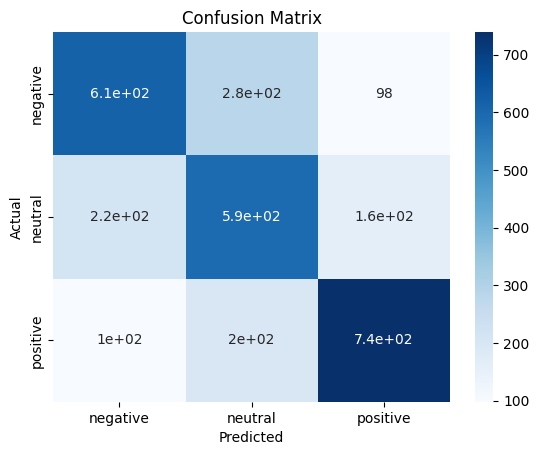

/tmp/ipython-input-3-668410305.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_balanced, palette='pastel')


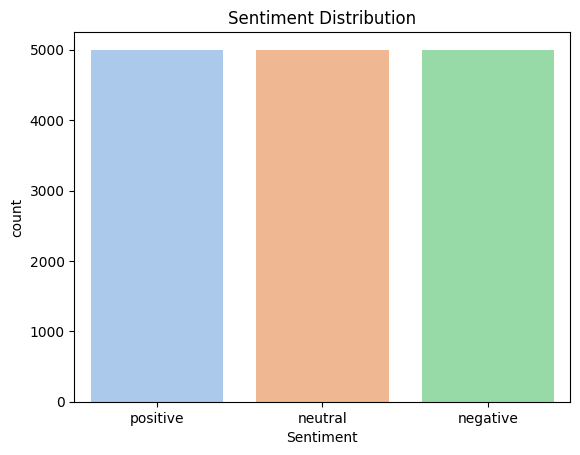

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load Dataset (Updated)
df = pd.read_csv("/content/Reviews.csv", on_bad_lines='skip', encoding='utf-8')

# Basic Preprocessing
df = df[['Score', 'Text']].dropna()

# Map scores to sentiments
def label_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Score'].apply(label_sentiment)

# Optional: balance dataset for equal class distribution
df_balanced = pd.concat([
    df[df['Sentiment'] == 'positive'].sample(5000, random_state=1),
    df[df['Sentiment'] == 'neutral'].sample(5000, random_state=1),
    df[df['Sentiment'] == 'negative'].sample(5000, random_state=1)
])

# Text Cleaning
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r"http\S+|[^a-zA-Z]", ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df_balanced['CleanText'] = df_balanced['Text'].apply(preprocess)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_balanced['CleanText'])
y = df_balanced['Sentiment']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sentiment Distribution
sns.countplot(x='Sentiment', data=df_balanced, palette='pastel')
plt.title('Sentiment Distribution')
plt.show()
